## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering utilisé pour regrouper des points de données en fonction de leur densité dans l'espace.

In [1]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

# permet d'afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary,Monetary_bis
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348,38.71
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432,179.12
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373,28.62
...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089,85.08
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569,195.00
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809,271.01
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544,220.58


Pour simplifier notre étude sur le nombre de cluster que nous allons créer, nous pouvons effectuer un échantillonnage de nos données afin d'optimiser les test de clustering.

In [3]:
df = df.drop(columns='Monetary_bis')

In [4]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [5]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [6]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


Nous étudions le silhouette score pour différentes possibilitées de clustering, de 5 à 15. 
Le silhouette score est une métrique utilisée pour évaluer la qualité d'un clustering. Il mesure à quel point les clusters sont bien séparés les uns des autres. Un silhouette score plus élevé indique les clusters sont mieux définis.

In [7]:
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN

silhouettes = []

# on regarde de 2 à 15 nombre de point autour d'un point
for num_points in range(5, 15):
    cls = cluster.DBSCAN(eps=0.5, min_samples=num_points)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

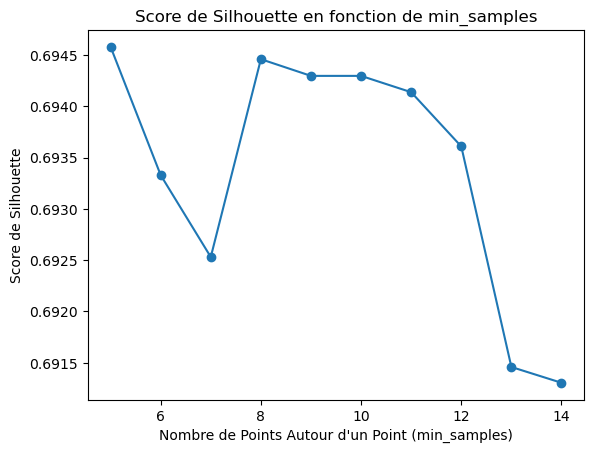

In [8]:
plt.plot(range(5, 15), silhouettes, marker='o')
plt.xlabel('Nombre de Points Autour d\'un Point (min_samples)')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction de min_samples')
plt.show()

Pour optimiser le paramètre eps du modèle DBSCAN nous testons différents paramètres pour choisir le plus pertinent en essayant de maximiser le silhouette score.

In [9]:
eps_values = np.linspace(0.1, 1.0, 10)

silhouettes = []

for eps in eps_values:
    cls = cluster.DBSCAN(eps=eps, min_samples=8)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

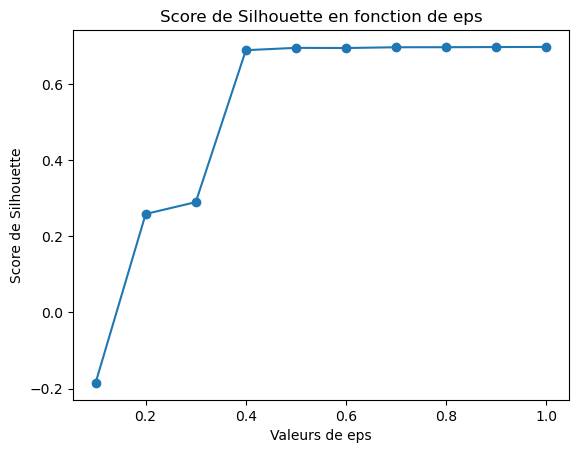

In [10]:
plt.plot(eps_values, silhouettes, marker='o')
plt.xlabel('Valeurs de eps')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction de eps')
plt.show()

In [11]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df = df.drop(columns='Monetary_bis')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [12]:
X = df.drop('customer_unique_id', axis=1).values
y = df['customer_unique_id'].values
print(X.shape)
print(y.shape)

(96096, 3)
(96096,)


In [13]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(96096, 3)


In [14]:
from sklearn.cluster import DBSCAN
import time

dbscan = DBSCAN(eps=0.5, min_samples=8)
scoring_time_start = time.time()
labels = dbscan.fit_predict(X_norm)
scoring_time_end = time.time()

Nous pouvons par la suite agréger les différents cluster observés aux différents individus et les observer graphiquement. Le nombre de variable de la segmentation RFM étant au nombre de 3 nous effectuons une visualisation graphique en 3D.

In [15]:
df_cluster = df.copy()
df_cluster['Cluster'] = labels

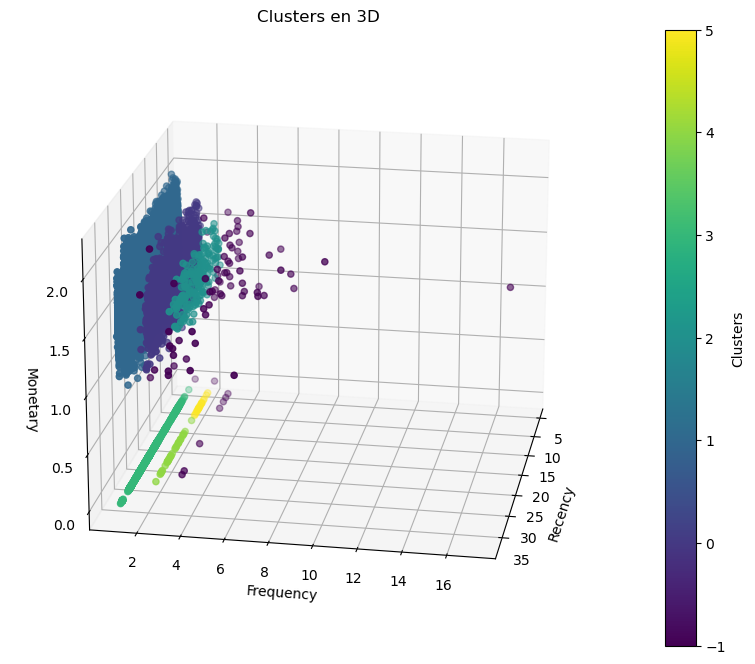

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_cluster['Recency'],
                     df_cluster['Frequency'],
                     df_cluster['Monetary'],
                     c=df_cluster['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

In [18]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df_cluster['Monetary_bis'] = df['Monetary_bis']

In [19]:
cluster_dataset = '../Data/3.DBSCAN_clusters.csv'
df_cluster.to_csv(cluster_dataset, index=False)

Cette étape nous permet d'évaluer la pertinence du modèle en réalisant une étude de sa performance avec différentes métriques.
 - Un métric de temps de calcul du modèle de ML.
 - Le silhouette score
 - le coefficient de distortion n'est pas disponible pour ce modèle de ML donc nous l'initialisons à 0.
 - Davies Bouldin (mesure à quel point les clusters sont compacts et bien séparés les uns des autres.)

In [20]:
from sklearn.metrics import davies_bouldin_score

duration_time = scoring_time_end - scoring_time_start
silh_score = metrics.silhouette_score(X_norm, dbscan.labels_)
distortion = 0
db_score = davies_bouldin_score(X_norm, dbscan.labels_)

In [21]:
import sys
sys.path.append('..')

In [22]:
from PythonFiles.Utils2 import *

In [23]:
resultats_modele2 = scoring_function('DBSCAN',
                                     duration_time,
                                     silh_score,
                                     distortion,
                                     db_score)
resultats_modele2

,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,DBSCAN,60.573306,0.690714,0,0.80811


In [24]:
AllScore_function(resultats_modele2)

In [25]:
df_testx = pd.read_csv('../Data/0.global_scoring.csv')
df_testx

,Unnamed: 0,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,NaN,k_means,0.318596,0.408218,98799.913722,0.686319
1,NaN,DBSCAN,60.573306,0.690714,0.000000,0.808110
